This notebook opens the ESO-MPG files and locates the SNe within them, plotting them in a folder.
This notebook also writes the ESO-MPG galaxies and their filenames in ../Data/NBdata.csv

The ESO-MPG files have this address: /home/mayker.1/Desktop/SNeHaLargeData/HaSUB_wcomb_corr/


In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from astropy.io import fits
from astropy.wcs import WCS
import sys, os
#!{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
from astropy.table import Table, join

In [14]:
#Load NB galaxy file data

NBtable = Table.read('../Data/0.NBdata.csv', format = "csv")
NBtable.sort("Galaxy")

NBtable[0]

Galaxy,ESO-MPG_Hasub_wcomb_corr
str8,str85
IC5332,/home/mayker.1/Desktop/SNeHaLargeData/HaSUB_wcomb_corr/IC5332_Hasub_flux_corrs.fits


In [15]:
# Store file information for plotting
galaxies, plots, wcss, hdus, xcoords, ycoords, heights, widths, valmins, valmaxs = [],[],[],[],[],[],[],[],[],[]

for i in range(len(NBtable)):
    fileName = NBtable["ESO-MPG_Hasub_wcomb_corr"][i]

    if os.path.isfile(fileName):
        NB_hdu = fits.open(fileName)
        NB_map = NB_hdu[0].data
        wcs = WCS(NB_hdu[0].header, naxis=2)
        
        regName = "/home/mayker.1/Desktop/SNeHaLargeData/" + NBtable["Galaxy"][i] + ".reg"
        if os.path.isfile(regName):
            galaxies.append(NBtable["Galaxy"][i])
            hdus.append(NB_hdu)
            plots.append(NB_map)
            wcss.append(wcs)
            
            xcoord, ycoord, height, width = np.genfromtxt(regName, dtype = int, delimiter = " ", unpack=True, usecols = (1,2,3,4))
            xcoords.append(xcoord)
            ycoords.append(ycoord)
            heights.append(height)
            widths.append(width)

            valmins.append(np.nanpercentile(NB_map,5))
            valmaxs.append(np.nanpercentile(NB_map,95))

        else: pass
                         
    else:
        print("File Not Found: ", fileName)
    


<ipython-input-4-0cca600ebb92>:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")


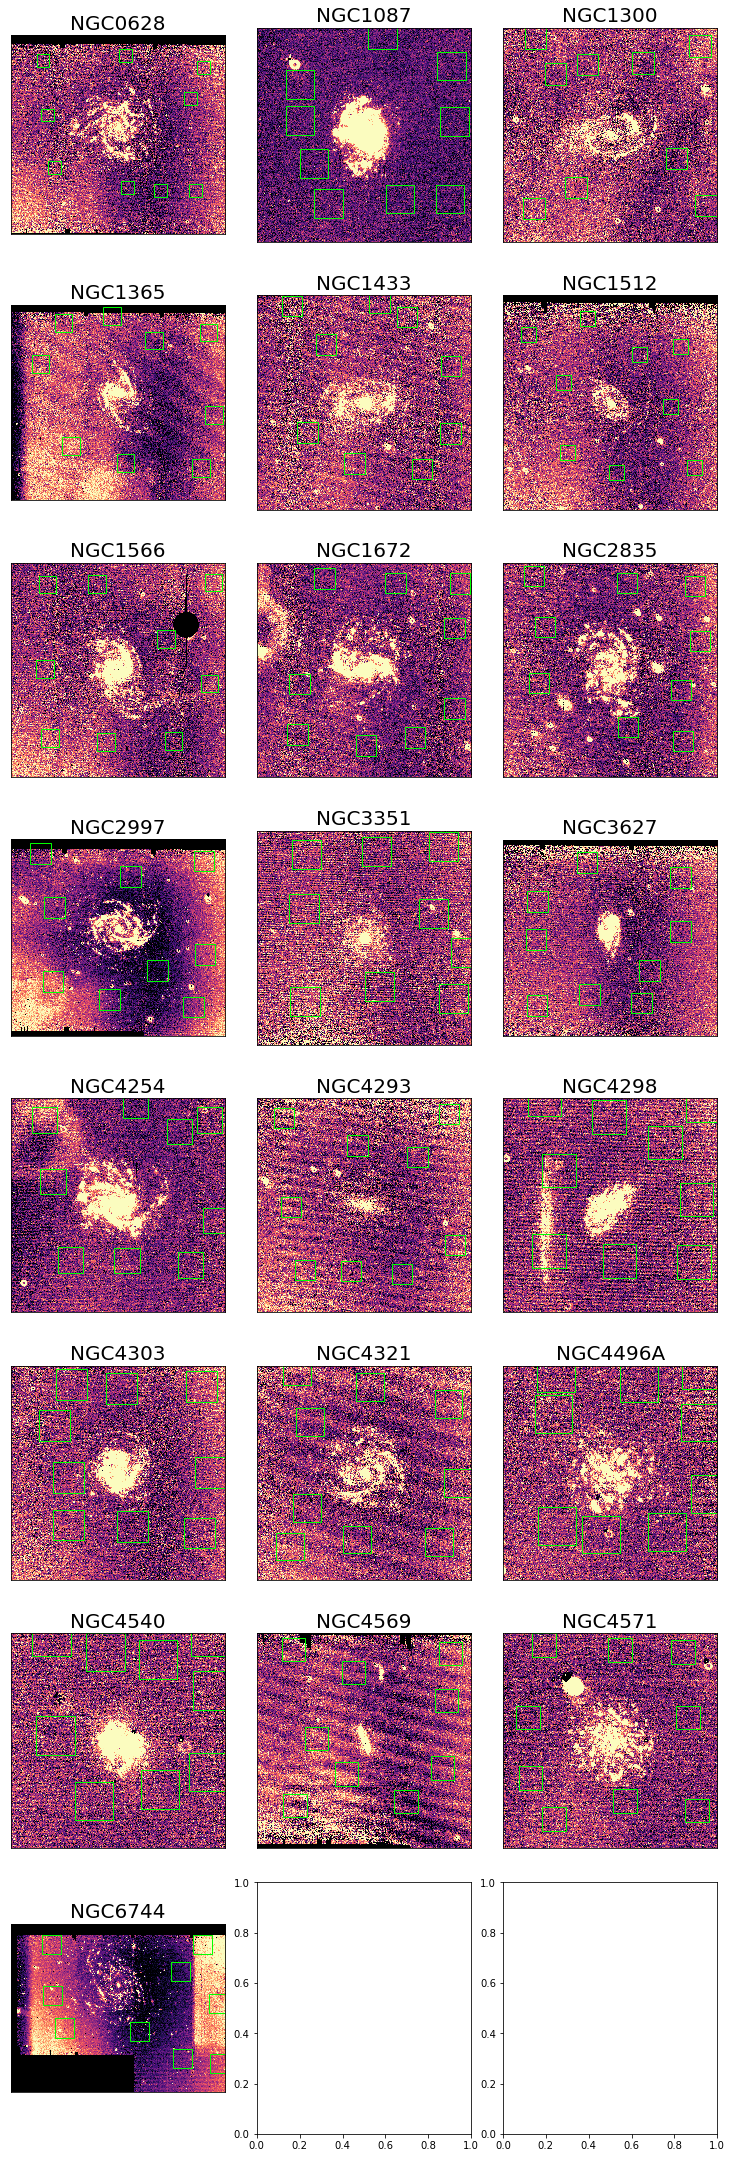

In [4]:
# make multipanel plot of NB galaxies with error boxes
# plots, wcss, hdus, xcoords, ycoords, heights, widths, valmins, valmaxs
        
current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 30))
for plot in plots:
    # logplot = np.log10(plot)
    # axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest")
    axs[i][j].imshow(plot, cmap=current_cmap, origin = "lower", interpolation = "nearest", vmin=valmins[m], vmax=valmaxs[m])
    axs[i][j].set_title(galaxies[m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    
    for x in range(len(xcoords[m])):
        axs[i][j].add_patch(Rectangle((xcoords[m][x], ycoords[m][x]), heights[m][x], widths[m][x], alpha=1, edgecolor='lime', fill = False))
            
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m+=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/ESO-MPGGalaxiesErrorBoxes.png", dpi=100)
plt.close()
    
    

In [5]:
print(xcoords)

[array([ 600, 2520, 4340, 4146, 2570,  870,  700, 4040, 3330]), array([ 200,  200,  300,  400,  900, 1250, 1280, 1260,  780]), array([ 300,  580,  870, 2690, 2280,  280, 2605, 1810, 1030]), array([1240,  590, 1450, 3000, 5140, 5510, 5350, 3810, 2620]), array([ 360,  860,  590, 1270, 2260, 2670, 2680, 2040, 1640]), array([ 360, 1050, 1130, 2100, 3650, 3170, 3370, 2560, 1530]), array([ 475,  430,  520, 1470, 2620, 3230, 2490, 1320, 3300]), array([ 830,  470,  440, 2140, 2710, 2710, 2790, 1860, 1430]), array([ 320,  480,  390, 1730, 2750, 1720, 2820, 2570, 2540]), array([ 470,  800, 2130, 4440, 4415, 2650, 4170,  770, 3300]), array([ 590,  550,  570, 3300, 3100, 1835, 2930, 2750, 1780]), array([ 590,  550,  570, 3300, 3100, 1835, 1780, 4050, 4050]), array([ 250,  350,  560, 1230, 1980, 1850, 2280, 2210, 1330]), array([ 250,  350,  560, 1230, 1980, 2670, 2760, 2210, 1330]), array([ 220,  350,  260,  890, 1560, 1580, 1640, 1300,  800]), array([ 740,  460,  680, 1730, 2810, 2980, 2840, 1550,

In [11]:
import astropy
#evaluate standard deviaton and median value for each box

StandardDevs, Medians = [],[]

# for i in range(len(plots)):
for i in range(0,1):
    std, med = [],[]
    
    for j in range(len(xcoords[i])):
        print(j)
        xstart = int(xcoords[i][j] -  heights[i][j]/2)
        xend =  int(xcoords[i][j] + heights[i][j]/2)
        ystart = int(ycoords[i][j] - heights[i][j]/2)
        yend = int(ycoords[i][j] + heights[i][j]/2)
    
        boxVals = plot[xstart:xend,ystart:yend]
        index = np.isfinite(boxVals)
    
        std.append(astropy.stats.mad_std(boxVals[index]))
        med.append(np.median(boxVals[index]))
        print(index)
        print(med)

    StandardDevs.append(std)
    Medians.append(med)

0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[nan]
1
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[nan, -0.45557067]
2
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[nan, -0.45557067, -0.13153258]
3
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  

In [7]:
print(StandardDevs)
print(Medians)

[[nan, 0.1519203870637581, 0.30485565914648644, 0.12080514086675738, 0.11659561484473627, nan, nan, 0.1778654372016246, 0.1350592294575123], [nan, nan, nan, nan, nan, nan, 0.4796993733006411, nan, nan], [nan, nan, nan, 0.19325586430065683, 0.1258047607747429, nan, 0.12726849900740153, 0.15660142215272535, nan], [0.15775989734063625, nan, 0.1622051281880175, 0.22516135903108445, 0.33347197908928017, 0.1683528950426677, 0.22933074299033684, 0.3219937793118406, 0.15055372325256655], [nan, nan, nan, 0.26398023601806075, 0.19818412545094122, 0.1163498137493237, 0.12901000617522304, 0.12008998472262648, 0.14258911382335773], [nan, nan, nan, 0.27460283766291554, 0.32985062155217443, 0.1271184025987881, 0.13973781227957405, 0.11664154514110178, 0.16405175144535664], [nan, nan, nan, 0.2453685685524259, 0.18351082072806324, 0.12613657899805308, 0.12254554340984669, 0.20384689577066492, 0.1714273749673482], [nan, nan, nan, 0.1991133799606701, 0.14191149282762752, 0.12707874657090157, 0.1179484045

In [8]:
#Find 16th, 50th, 84th %ile from the median values of the 9 boxes
#percentiles = [0.5/9,1.5/9,2.5/9,3.5/9,4.5/9,5.5/9,6.5/9,7.5/9,8.5/9]

def findSigma(statnoiseArr,medianArr):
    # find sigma_rms by averaging the std values for each box
    statNoise = np.sort(statnoiseArr)
    sigma_std = np.average(statNoise)
    # find sigma_back by finding the 1 sigma deviation in the median values of the boxes
    sortArr = np.sort(medianArr)
    sixteen = sortArr[1]
    fifty = sortArr[4]
    eightythree = sortArr[8]
    tiles = [sixteen, fifty, eightythree]
    sigma_back =  (eightythree-sixteen)/2.0
    # find the overall noise by adding the errors in quadrature
    Sigma = np.sqrt(sigma_std**2 + sigma_back**2)
    return(Sigma, statNoise, sigma_std, tiles, sigma_back)

Sigma, statNoise, sigma_std, tiles, sigma_back = findSigma(std,med)
print(Sigma, statNoise, sigma_std, tiles, sigma_back)
    
    

nan [0.13053092 0.14152494 0.18275716 0.18902462 0.20607283 0.21210359
        nan        nan        nan] nan [-0.4277107, 0.07846168, nan] nan
